# Calculating Energy Lost of  A Bouncing Ball Using Audio

The purpose of the Jupyter notebook is to go through how to take a vma recording of a golf ball bouncing on tile floor to calculate the energy lost in the inelasic collisions. The notebook is tailored to use the Voice Memo app on an iPhone, but a similar application is available on Android. To generate the necessary data, we placed a phone on the floor, began the recording, and dropped a golf ball sufficiently far away from the phone. Using that data we found the time of each bounce to calculate the coefficeient of restitution of each bounce to find the proportion of energy lost. 

### Input File Specification

The following assumes the input of a vma file with two channels. This is what is generated from the iPhone Voice Memo app, and it is my understanding is also generated from the Android sound recording app. We can then use this to find amplitude and time data. However, after we load the data and calculate the time of each sample, we also have to isolate just one of the channels to do the necessary calculations.

In [1]:
# The necessary libraries 
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import scipy.signal as sci
from scipy.signal import argrelmax
from pylab import*

### The Coefficient of Restitution and the Kinematics of a Bouncing Ball
A coefficient of restitution is primary way to describe the energy lost in a collision of a sphere. The coefficient of restitution is the ratio of final speed to initial speed of an object after a collision with another object. In our particular situation, this is the ratio of the speed of the golf ball as it leaves the tile floor to the speed of the golf ball right before it contacted the tile floor. We are interested in speed in terms of energy lost because the equation for kinetic energy is given by $$KE = \frac{1}{2}mv^2$$ where $m$ is the mass of an object and $v$ is it's velocity. The mass of the object remains constant throughout the ball bouncing, so the change in magnitude of velocity before and after the collision tells us how much energy lost in the collision. 

We will now apply one of the five fundamental kinematics equation to our scenario. The equation is as follows $$\Delta x = v_0t + \frac{1}{2}at^2$$ where $\Delta x$ represents the change in position from one bounce to the next, which would be 0. Then $v_0$ is the initial velocity immediately following on of the bounces. The acceleration is $a$ and is equal to the gravitational constant $g = 9.8 m/s^2$. The time of the $ith$ bounce is $t_i$ and $t$ in this equation represents the time between two consecutive bounces. Given the context of our problem, we can rewrite this equation as $$v_i = \frac{1}{2}g(t_{i+1}-t_i)$$ where $v_i$ is the velocity as the ball right after the $i-1$ bounce which is also the velocity right before the $ith$ bounce. Again, the variable $g$ will stay the same throughout our experiment, so instead looking at a ratio of velocities for the coefficient of restitution, it is sufficient to examine the ratio of time between bounces. Let $r$ be our coefficient of restitution, then $$r = \dfrac{t_{i+1}-t_i}{t_i-t_{i-1}.}$$ is the coefficient of restitution for the $ith$ bounce. However, the coefficient of restitution should be similar for each bounce. With the same object and surface, the same proportion of energy is lost each time.

In [2]:
# Loading the sound data and calculating the associated times
samplerate, data = wavfile.read('PSM COR Microphone Reading.wav')
times = np.arange(len(data))/float(samplerate)

# This tells us there is two channnels
data.shape

# Here we isolate one channel
data = data[:,0]

### Plotting the Data
Below there is a plot of the time versus amplitude, this gives a good picture of the data. Then there is another plot that is sample number versus amplitude. The user will need to first plot the whole data range and then input sample numbers that isolate the bounce data for a second. This process is shown below and the user will input the sample numbers into plt.xlim(x_1,x_2). This is necessary for the next part of the notebook where the user has to estimate sample numbers in between bounces for the notebook to calculcate the time of the bounce.

Text(0, 0.5, 'amplitude')

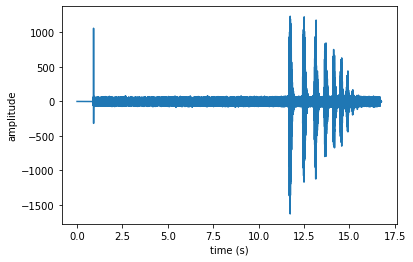

In [3]:
# The first plot showing time vs. amplitude
plt.plot(times, data)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

Text(0, 0.5, 'amplitude')

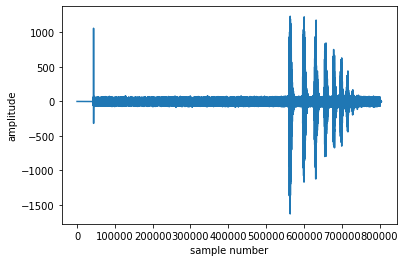

In [4]:
# The zoomed out plot of sample number vs. amplitude
plt.plot(data)
plt.xlabel('sample number')
plt.ylabel('amplitude')
#plt.xlim(200000, 400000)

(525000, 750000)

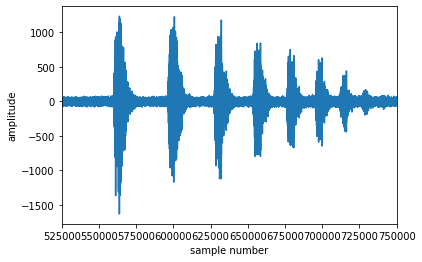

In [5]:
# USER NEEDS TO CHANGE x limits to match their own data set
# The zoomed in plot of sample number vs. amplitude
plt.plot(data)
plt.xlabel('sample number')
plt.ylabel('amplitude')
plt.xlim(525000, 750000)

### User Input
Here the user needs to make their best guess to find a sample number in between each bounce based on the plot. An example is shown below. The user also has the option to calculate one, two, or three trials of the coefficient of restitution. Simply run the cell below and answer the questions based on the above zoomed in plot

In [6]:
# In this cell the user will provide input based on the above plot to find the times of bounces
one = input("What is your best guess for a sample number in between the start of the recording and first bounce?")
two = input("What is your best guess for a sample number in between the first and second bounce?")
three = input("What is your best quess for a sample number in between the second and third bounce?")
four = input("What is your best guess for a sample number in between the third and fourth bounce?")
question1 = input("Would you like to do another bounce? (y/n)")
if question1.lower() == 'y':
    five = input("What is your best guess for a sample number in between the fourth and fifth bounce?")
    question2 = input("Would you like to do another bounce? (y/n)")
    if question2.lower() == 'y':
        six = input("What is your best guess for a sample number in between the fourth and fifth bounce?")
    else:
        six = 0
else:
    five = 0
    six = 0

What is your best guess for a sample number in between the start of the recording and first bounce?525000
What is your best guess for a sample number in between the first and second bounce?575000
What is your best quess for a sample number in between the second and third bounce?612500
What is your best guess for a sample number in between the third and fourth bounce?640000
Would you like to do another bounce? (y/n)y
What is your best guess for a sample number in between the fourth and fifth bounce?665000
Would you like to do another bounce? (y/n)y
What is your best guess for a sample number in between the fourth and fifth bounce?690000


In [8]:
index_1 = np.argmax(data[int(one):int(two)])
index_2 = np.argmax(data[int(two):int(three)])
t_first = times[index_2+int(two)]-times[index_1+int(one)]
index_3 = np.argmax(data[int(three):int(four)])
t_second = times[index_3+int(three)] - times[index_2+int(two)]
cr1 = t_second / t_first
print("The calculated coefficient of restitution is:", round(cr1,2))
if five != 0:
    index_4 = np.argmax(data[int(four):int(five)])
    t_third = times[index_4+int(four)] - times[index_3+int(three)]
    cr2 = t_third / t_second
    print("The calculated coefficient of restitution is:", round(cr2,2))
    if six != 0:
        index_5 = np.argmax(data[int(five):int(six)])
        t_fourth = times[index_5+int(five)] - times[index_4+int(four)]
        cr3 = t_fourth / t_third
        print("The calculated coefficient of restitution is:", round(cr3,2))
        
print(times[index_1+int(one)])
print(times[index_2+int(two)])
print(times[index_3+int(three)])
print(times[index_4+int(four)])
print(times[index_5+int(five)])


The calculated coefficient of restitution is: 0.85
The calculated coefficient of restitution is: 0.83
The calculated coefficient of restitution is: 0.76
11.7439375
12.5134375
13.170833333333333
13.718708333333334
14.136041666666667


$$r = \dfrac{t_{i+1}-t_i}{t_i-t_{i-1}}$$
$$r_1 = \dfrac{0.66}{0.77} = 0.85$$